# Import modules

In [41]:
import re
import numpy as np
import pandas as pd

In [42]:
# Seaborn是一個基於matplotlib的Python圖形可視化庫。 在Matplotlib 的基礎上，進行了更高級的處理
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [43]:
# nltk是一個處理文字的package，通常在英文的文本上
# 詞形還原（Lemmatization）是文本預處理中的重要部分，與詞幹提取（stemming）很相似。
# Lemmatization 是去掉單詞的詞綴，提取單詞的主幹部分，通常提取後的單詞會是字典中的單詞

from nltk.stem import WordNetLemmatizer

In [44]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# import dataset (.csv)

In [45]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/tweets.csv'
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(file_path, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1117514,4,1973435182,Sat May 30 11:08:30 PDT 2009,NO_QUERY,tamaletracker,@JakesAlterEgo no worries. just a flaw in the ...
985288,4,1834462960,Mon May 18 03:01:52 PDT 2009,NO_QUERY,Tisyonk,yuhuuu just got back from morning test at work...
1324809,4,2015051244,Wed Jun 03 03:32:51 PDT 2009,NO_QUERY,deabarnes,@sergeantkero asyiiiiik allright I'll buy some...
1033017,4,1936063234,Wed May 27 07:23:17 PDT 2009,NO_QUERY,Dantheman000,What a great day!!! My portfolio is up 66% wit...
1581098,4,2190148454,Tue Jun 16 01:54:28 PDT 2009,NO_QUERY,developar,Shawarma today


In [46]:
print(df.columns)
print('shape of data', df.shape)

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')
shape of data (1600000, 6)


# Preprocessing

## Deal with labels

In [47]:
data=df[['text','target']]

In [48]:
data['target'] = data['target'].replace(4,1)

<ipython-input-48-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [49]:
data['target'].unique()

array([0, 1])

In [50]:
dataset = data

## taking 1/4 data

In [51]:
# # Separating positive and negative tweets

# data_pos = data[data['target'] == 1]
# data_neg = data[data['target'] == 0]

In [52]:
# data_pos = data_pos.iloc[:int(20000)]
# data_neg = data_neg.iloc[:int(20000)]

In [53]:
# # Combining positive and negative tweets

# dataset = pd.concat([data_pos, data_neg])

## Deal with text

### Making statement text in lower case

In [54]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

<ipython-input-54-cfdfd7510b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']=dataset['text'].str.lower()


1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

### Defining a set containing stopwords

In [55]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)

### Cleaning stopwords

In [56]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))

<ipython-input-56-9c595f1eec58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))


In [57]:
dataset['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

### Cleaning and removing punctuations

In [58]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

In [59]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

<ipython-input-59-4bb8ec53de6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))


In [60]:
dataset['text'].head()

0    switchfoot httptwitpiccom2y1zl  awww thats bum...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4    nationwideclass no its not behaving all im mad...
Name: text, dtype: object

### Cleaning and removing repeating characters


In [61]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))

<ipython-input-61-b88ad2461137>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))


In [62]:
dataset['text'].head()

0    switchfoot httptwitpiccom21zl  awww thats bumm...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4    nationwideclass no its not behaving all im mad...
Name: text, dtype: object

### Cleaning and removing URL’s

In [63]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))

<ipython-input-63-c89bd1e464e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))


In [64]:
dataset['text'].head()

0    switchfoot httptwitpiccom21zl  a s bummer shou...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4    nationwideclass no its not behaving all im mad...
Name: text, dtype: object

### Removing Numeric numbers

In [65]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))

<ipython-input-65-8e03d218c950>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))


In [66]:
dataset['text'].head()

0    switchfoot httptwitpiccomzl  a s bummer should...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save  r...
3                     whole body feels itchy like fire
4    nationwideclass no its not behaving all im mad...
Name: text, dtype: object

## tokenization

In [67]:
# Getting tokenization of tweet text

from nltk.tokenize import RegexpTokenizer
# 按照自己的規則進行分詞,使用正則分詞器：RegexpTokenizer
# RegexpTokenizer()裡面放的第一個參數會是你希望它留下來的東西。也就是說，你要告訴它每次遇到非什麼條件的東西就要停下來分割字串
# \w+ 參數可讓斷詞器既在空白的地方斷掉，又拿掉標點符號
tokenizer = RegexpTokenizer("\w+") 

dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

<ipython-input-67-3ef4fe3bd479>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(tokenizer.tokenize)


In [68]:
dataset['text'].head()

0    [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

## Stemming

- Stemming 與 Lemmatization的目的就是及將這些不同的表示型態歸一化，藉此來降低文本的複雜度
- 其優點為能夠大幅降低詞數量，在建立 BOW (bag of word) 時可以降低表示文本的維度，以降低資料複雜度，加快語言模型訓練速度

- university
- universal
- universities
- universe

=> stemming完後會變 → univers
=> ⚠️ 可能會有 Overstemming 的問題，就是切的太多了

In [69]:
# Applying Stemming

import nltk
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))

<ipython-input-69-901fe2ec0a24>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))


In [70]:
dataset['text'].head()

0    [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

## Separating input feature and label

In [71]:
X = dataset.text
y = dataset.target

In [98]:
data_neg = X[:800000]

neg = []
for i in range(0, 20000): 
  neg = neg + data_neg[i].copy()

# neg

In [99]:
# print(type(neg))
neg_str = ''.join(str(x) for x in neg)

<class 'list'>


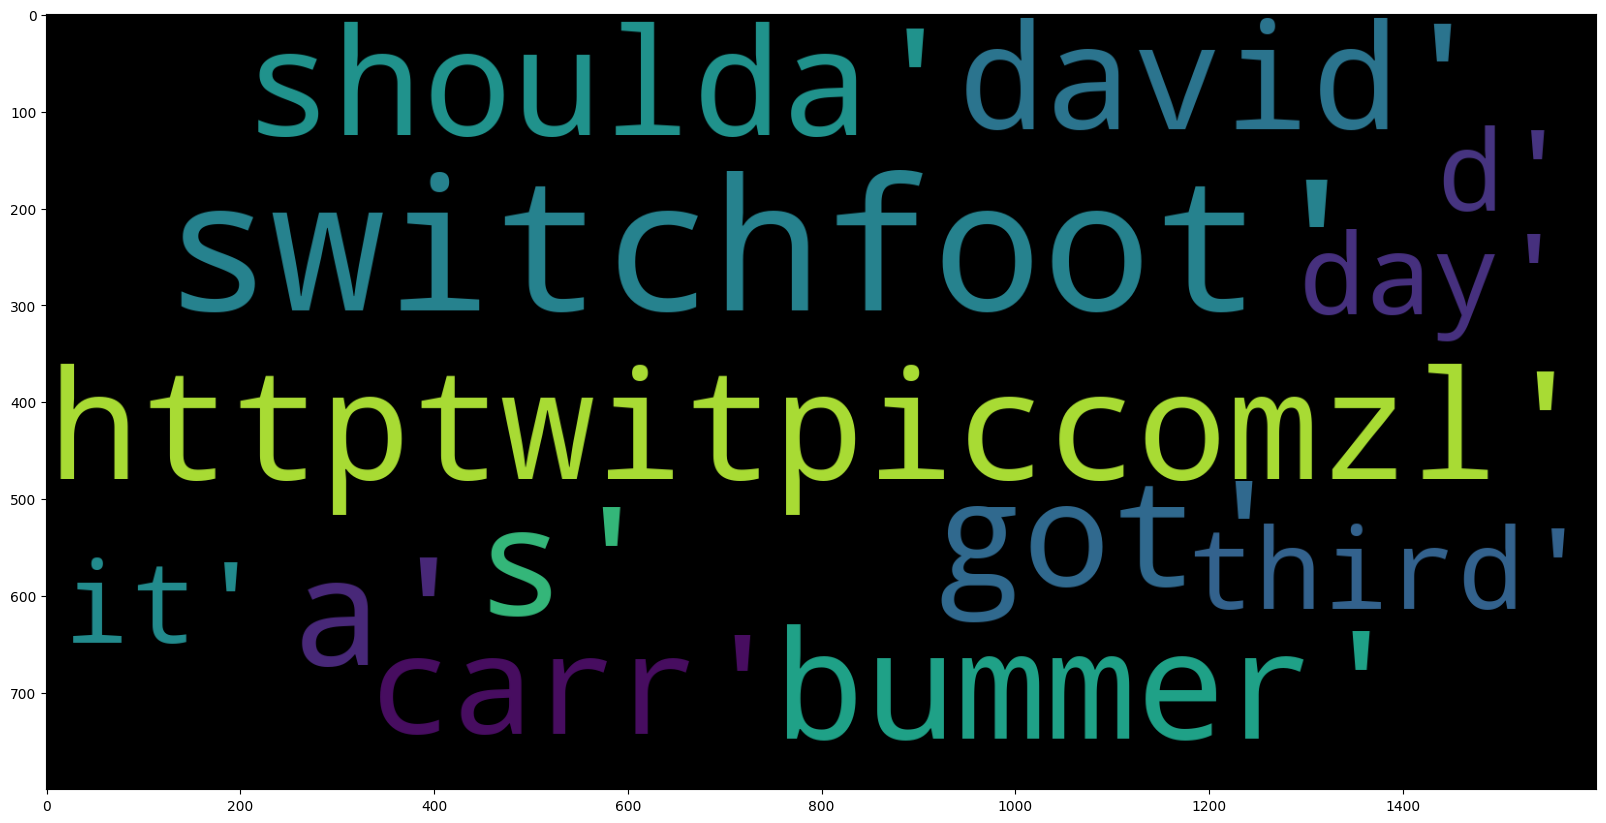

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=True).generate(neg_str)
plt.imshow(wc)

# Separating the data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## Fit the TF-IDF Vectorizer

TF-IDF 和 Word2Vec 一樣，是種將文字轉換為向量的方式
> 目的為 找到文件當中的關鍵字

- TF 表示詞頻 term frequency
- IDF 表示逆向檔案頻率 inverse document frequency


- 找到文件當中的關鍵字
- 一個直覺的想法是出現最多次的字，但因為每個文件的字數不同，無法比較。
- 所以 TF 的公式為：特定單字在文件出現次數 / 出現在文件總次數

- 但上述做法可能讓一些定冠詞，或是常用單字，像是a, an, the, and, or 得到很高的分數
- 一個簡單的作法是先把這些字詞去掉 (stopword)，亦可降低這些單字的分數
- IDF 會去計算一個字出現在文件的逆向頻率，這表示出現頻率越高，出現在越多文件之中，但是得分會越低
- 透過 TF 和 IDF 相乘，即為 TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

### Transform the data using TF-IDF Vectorizer

In [ ]:
list = []
for a,b in X_train.items():
  s = " ".join(str(x) for x in b)
  list.append(s)

X_train = vectoriser.fit_transform(list)

list2 = []
for a,b in X_test.items():
  s = " ".join(str(x) for x in b)
  list2.append(s)

X_test  = vectoriser.transform(list2)

# Build up Model

## Bernoulli Naive Bayes

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

LinearSVC()

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

# Evaluation

In [ ]:
def model_Evaluate(model, name):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)

  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))

  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)

  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix of " + name, fontdict = {'size':18}, pad = 20)
  plt.savefig("c matrix_" + name + ".png")

## BNBmodel

              precision    recall  f1-score   support

           0       0.81      0.77      0.79    160260
           1       0.78      0.81      0.80    159740

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



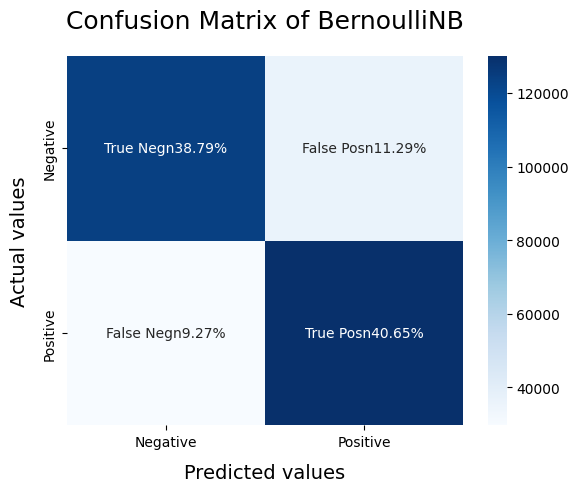

In [ ]:
model_Evaluate(BNBmodel, "BernoulliNB")

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    160260
           1       0.79      0.81      0.80    159740

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



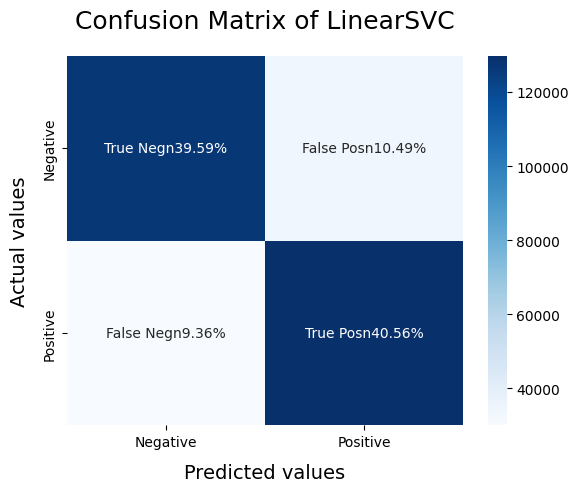

In [ ]:
model_Evaluate(SVCmodel, "LinearSVC")

              precision    recall  f1-score   support

           0       0.82      0.80      0.81    160260
           1       0.81      0.83      0.82    159740

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



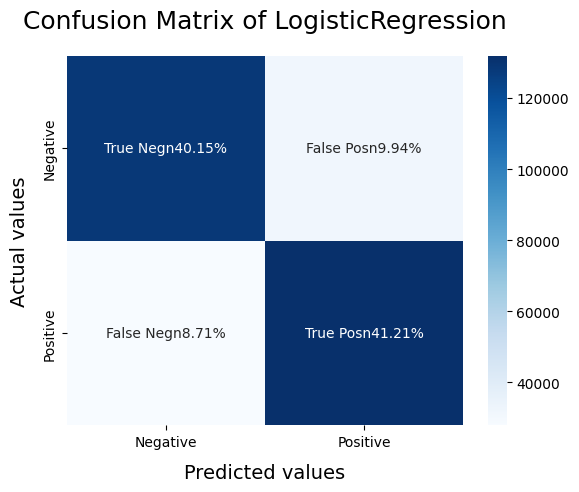

In [ ]:
model_Evaluate(LRmodel, "LogisticRegression")

              precision    recall  f1-score   support

           0       0.79      0.80      0.80    160260
           1       0.80      0.79      0.79    159740

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



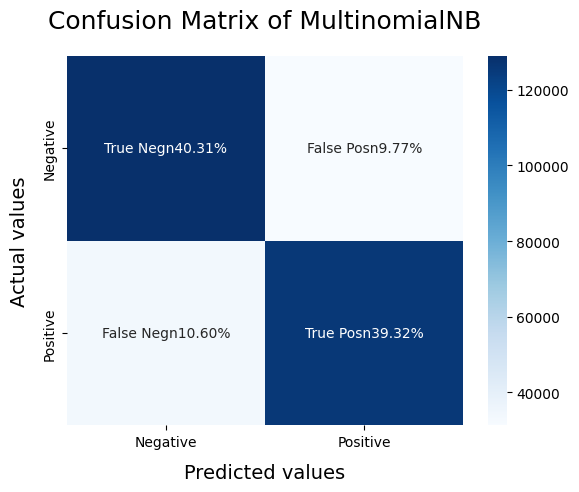

In [ ]:
model_Evaluate(MNB_model, "MultinomialNB")